In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\Ferah Shan\\Downloads\\NSSO68.csv", low_memory=False)

In [3]:
kerala_data = data[data['state_1'] == 'KE']

In [9]:
missing_values = kerala_data.isnull().sum().sort_values(ascending = False)
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
soyabean_v       3
soyabean_q       3
pulsestt_v       0
pulsep_v         0
besan_v          0
                ..
ediblest_q       0
edibletotal_q    0
edioilothr_q     0
cocooil_q        0
fv_tot           0
Length: 384, dtype: int64


In [10]:
kerala_data = kerala_data.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

In [11]:
missing_values_after = kerala_data.isna().sum().sort_values(ascending = False)
print("Missing values after replacement for Kerala:")
print(missing_values_after)

Missing values after replacement for Kerala:
soyabean_v       3
soyabean_q       3
pulsestt_v       0
pulsep_v         0
besan_v          0
                ..
ediblest_q       0
edibletotal_q    0
edioilothr_q     0
cocooil_q        0
fv_tot           0
Length: 384, dtype: int64


In [8]:
numeric_columns = kerala_data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    Q1 = kerala_data[col].quantile(0.25)
    Q3 = kerala_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((kerala_data[col] < (Q1 - 1.5 * IQR)) | (kerala_data[col] > (Q3 + 1.5 * IQR)))
    print(f"{col} has {outliers.sum()} Outliers in Kerala")
    kerala_data = kerala_data[~outliers]

slno has 0 Outliers in Kerala
Round_Centre has 0 Outliers in Kerala
FSU_number has 0 Outliers in Kerala
Round has 0 Outliers in Kerala
Schedule_Number has 0 Outliers in Kerala
Sample has 0 Outliers in Kerala
Sector has 0 Outliers in Kerala
state has 0 Outliers in Kerala
State_Region has 0 Outliers in Kerala
District has 0 Outliers in Kerala
Stratum_Number has 0 Outliers in Kerala
Sub_Stratum has 0 Outliers in Kerala
Schedule_type has 0 Outliers in Kerala
Sub_Round has 0 Outliers in Kerala
Sub_Sample has 0 Outliers in Kerala
FOD_Sub_Region has 5 Outliers in Kerala
Hamlet_Group_Sub_Block has 0 Outliers in Kerala
t has 356 Outliers in Kerala
X_Stage_Stratum has 0 Outliers in Kerala
HHS_No has 257 Outliers in Kerala
Level has 0 Outliers in Kerala
Filler has 0 Outliers in Kerala
hhdsz has 132 Outliers in Kerala
NIC_2008 has 383 Outliers in Kerala
NCO_2004 has 339 Outliers in Kerala
HH_type has 0 Outliers in Kerala
Religion has 1 Outliers in Kerala
Social_Group has 0 Outliers in Kerala
Wheth

In [46]:
kl_new = kerala_data[['foodtotal_q', 'MPCE_MRP', 'MPCE_URP', 'Age', 'Possess_ration_card', 'Education', 'Meals_At_Home', 'No_of_Meals_per_day']]

In [47]:
kl_new.isnull().sum().sort_values(ascending = False)

foodtotal_q            0
MPCE_MRP               0
MPCE_URP               0
Age                    0
Possess_ration_card    0
Education              0
Meals_At_Home          0
No_of_Meals_per_day    0
dtype: int64

In [48]:
kl_new.isnull().any()

foodtotal_q            False
MPCE_MRP               False
MPCE_URP               False
Age                    False
Possess_ration_card    False
Education              False
Meals_At_Home          False
No_of_Meals_per_day    False
dtype: bool

In [49]:
import statsmodels.api as sm

In [50]:
y = kl_new['foodtotal_q']
x = kl_new[['MPCE_MRP', 'MPCE_URP', 'Age', 'Possess_ration_card', 'Education', 'Meals_At_Home', 'No_of_Meals_per_day']]


In [51]:
x = sm.add_constant(x)

In [52]:
model = sm.OLS(y, x).fit()

In [53]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            foodtotal_q   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 23 Jun 2024   Prob (F-statistic):                nan
Time:                        18:31:10   Log-Likelihood:                 92.768
No. Observations:                   3   AIC:                            -179.5
Df Residuals:                       0   BIC:                            -182.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
MPCE_MRP                0.0006    

C:\Users\Ferah Shan\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Ferah Shan\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Ferah Shan\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Ferah Shan\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


# Regression Diagnostics

1. Linearity

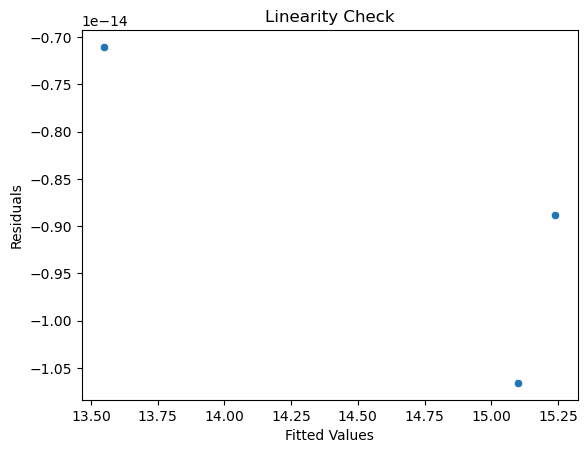

In [54]:
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

2. Homoscedasticity

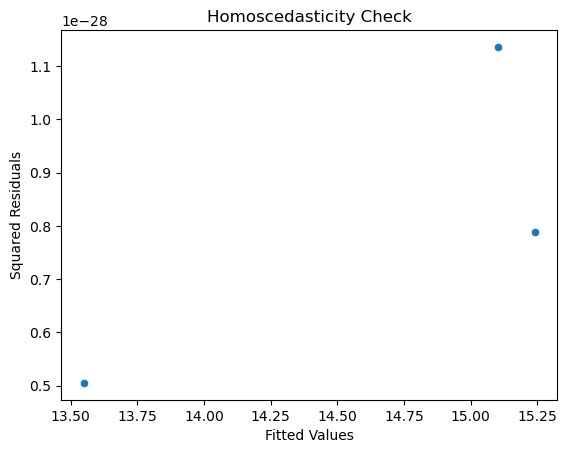

In [55]:
sns.scatterplot(x=model.fittedvalues, y=model.resid**2)
plt.xlabel('Fitted Values')
plt.ylabel('Squared Residuals')
plt.title('Homoscedasticity Check')
plt.show()

 3. Normality of Residuals

C:\Users\Ferah Shan\AppData\Local\Temp\ipykernel_28396\1671985890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid, kde=False)


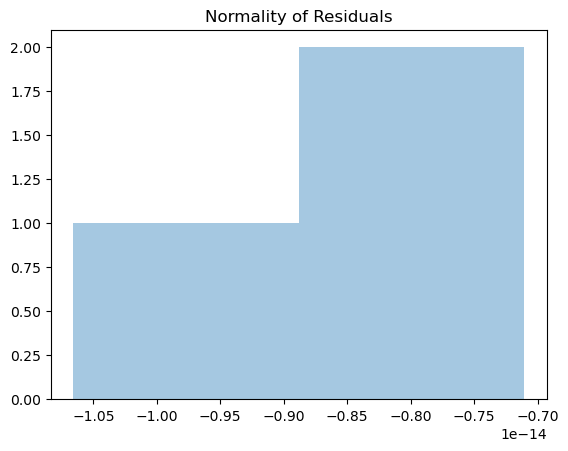

In [56]:
sns.distplot(model.resid, kde=False)
plt.title('Normality of Residuals')
plt.show()

4. Multicollinearity

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
print(vif)

   VIF             features
0  inf             MPCE_MRP
1  inf             MPCE_URP
2  inf                  Age
3  0.0  Possess_ration_card
4  inf            Education
5  0.0        Meals_At_Home
6  0.0  No_of_Meals_per_day


C:\Users\Ferah Shan\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Ferah Shan\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


5. Autocorrelation

In [58]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 0.06493506493506493
